In [1]:
!pip install torch
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torchvision.transforms import transforms
import h5py
import torch
import numpy as np
from matplotlib import pyplot as plt

from torch.utils.data import DataLoader


/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
"""
Please note that we should normalize the images. Otherwise, the model cannot learn meaningful representation of the images.
Even pyplot could not show the images properly. It only created very dark images with only few gray dots. But after normalization,
the 
To do normalization, every channel of the images were normalized based on the mean and std of that channel. 
"""


class Quark_Gluon_Dataset(Dataset):
    def __init__(self, data_size, start):
        with h5py.File('data/quark-gluon_data-set_n139306.hdf5', 'r') as f:
            print(f.keys())
            self.data_size = data_size
            self.x_jets_original = f['X_jets'][start:data_size]
            self.x_jet_data = self.normalize_img()
            self.transform = transforms.Compose([transforms.ToTensor()])



            # Read the data from the dataset into a numpy array
        f.close()
        del f

    def normalize_img(self):
        res = []
        counter = 0
        for x_jet in self.x_jets_original:
            counter+=1

            mean = np.mean(x_jet, axis=(0, 1))
            std = np.std(x_jet, axis=(0, 1))
            x_jet = (x_jet - mean) / std
            # plt.imshow(x_jet)
            # plt.show()
            res.append(x_jet)

        return res

    def __len__(self):
        return len(self.x_jet_data)

    def __getitem__(self, indx):
        img = self.x_jet_data[indx]
        img = self.transform(img)
        return img


In [3]:


"""
When I add dropout layers, the model generates some pink artifacts!
and I see this warning Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers)

"""


class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),

        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, kernel_size=3, stride=1, padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x



# class Autoencoder(nn.Module):
#     def __init__(self):
#         super(Autoencoder, self).__init__()
#         self.encoder = nn.Sequential(
#             nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(),
#             nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(),
#             nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(),
#             nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
#             nn.ReLU()
#         )
#
#         self.decoder = nn.Sequential(
#             nn.ConvTranspose2d(128, 64, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(),
#             nn.ConvTranspose2d(64, 32, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(),
#             nn.ConvTranspose2d(32, 16, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(),
#             nn.ConvTranspose2d(16, 3, kernel_size=3, stride=1, padding=1),
#             nn.Sigmoid()
#         )
#
#     def forward(self, x):
#         x = self.encoder(x)
#         x = self.decoder(x)
#         return x

# class Autoencoder(nn.Module):
#     def __init__(self, dropout_prob):
#         super(Autoencoder, self).__init__()
#         self.encoder = nn.Sequential(
#             nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
#             nn.BatchNorm2d(16),
#             nn.ReLU(),
#             nn.Dropout2d(dropout_prob),
#             nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
#             nn.BatchNorm2d(32),
#             nn.ReLU(),
#             nn.Dropout2d(dropout_prob),
#             nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
#             nn.BatchNorm2d(64),
#             nn.ReLU(),
#             nn.Dropout2d(dropout_prob),
#             nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
#             nn.BatchNorm2d(128),
#             nn.ReLU(),
#             nn.Dropout2d(dropout_prob)
#
#         )
#
#         self.decoder = nn.Sequential(
#             nn.ConvTranspose2d(128, 64, kernel_size=3, stride=1, padding=1),
#             nn.BatchNorm2d(64),
#             nn.ReLU(),
#             nn.Dropout2d(dropout_prob),
#             nn.ConvTranspose2d(64, 32, kernel_size=3, stride=1, padding=1),
#             nn.BatchNorm2d(32),
#             nn.ReLU(),
#             nn.Dropout2d(dropout_prob),
#             nn.ConvTranspose2d(32, 16, kernel_size=3, stride=1, padding=1),
#             nn.BatchNorm2d(16),
#             nn.ReLU(),
#             nn.Dropout2d(dropout_prob),
#             nn.ConvTranspose2d(16, 3, kernel_size=3, stride=1, padding=1),
#             nn.Sigmoid()
#         )
#
#     def forward(self, x):
#         x = self.encoder(x)
#         x = self.decoder(x)
#         return x

<KeysViewHDF5 ['X_jets', 'm0', 'pt', 'y']>


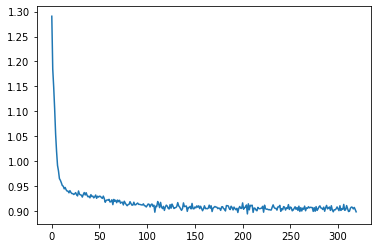

<KeysViewHDF5 ['X_jets', 'm0', 'pt', 'y']>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


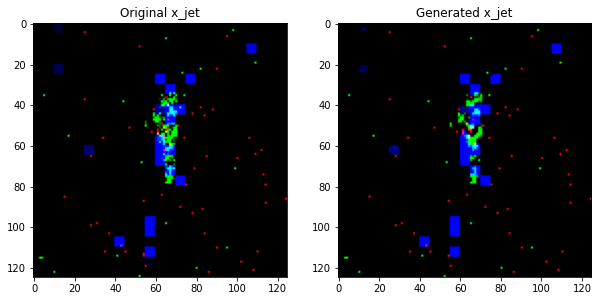

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


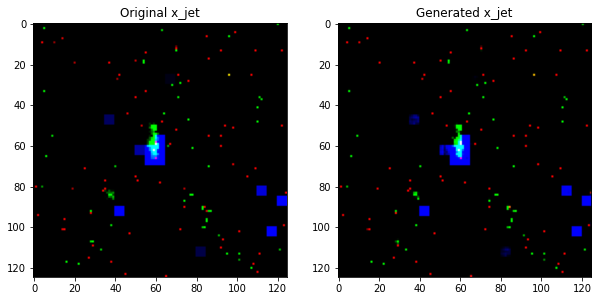

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


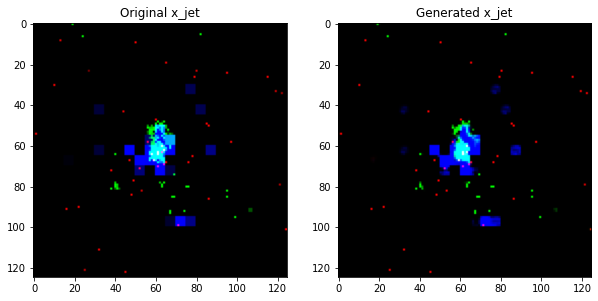

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


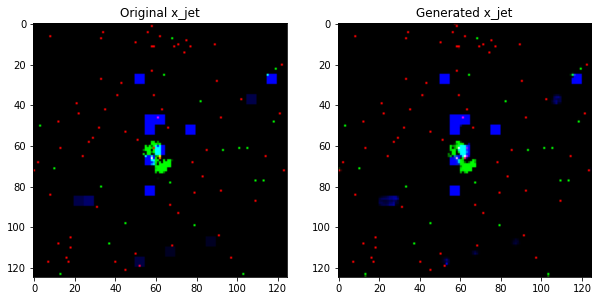

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


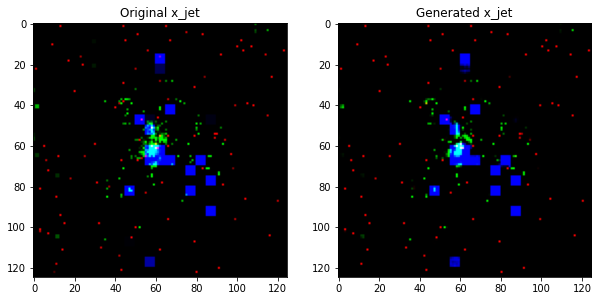

In [4]:

data_size = 500
train_size = 400
start=0


q_g_train_data = Quark_Gluon_Dataset(data_size,start)


# dropout_prob = 0.2
# model = Autoencoder(dropout_prob)

model = Autoencoder()
device = ('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

n_epochs = 20
learning_rate =0.01

train_loader = DataLoader(q_g_train_data, batch_size= 32, shuffle=True)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()
loss_list = []
model.train()
for epoch in range(n_epochs):
    for x_jet in train_loader:
        x_jet = x_jet.to(device)
        optimizer.zero_grad()
        output = model(x_jet)
        loss = criterion(output,x_jet)
        loss_list.append(loss.item())
        loss.backward()
        optimizer.step()

plt.plot(loss_list)
plt.show()
model.to('cpu')
model.eval()
q_g_test_data = Quark_Gluon_Dataset(data_size+100,data_size)
for i in range(5):
    x_jet = q_g_test_data[i]
    #x_jet = x_jet.to('cpu')
    output = model(x_jet.unsqueeze(0))
    print('test')

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

    # Display the first image in the first subplot
    ax1.imshow(x_jet.detach().permute((2, 1, 0)))
    ax1.set_title("Original x_jet")

    # Display the second image in the second subplot
    ax2.imshow(output.squeeze(0).detach().permute((2, 1, 0)))
    ax2.set_title("Generated x_jet")

    # Show the plot
    plt.show()



